# Chapter 6: Decision Trees


Decision trees are pretty naive cuts of the coordinate axes to determine categories. They can also be used to predict values (regression) by looking at the average value of a class.



In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()


In [2]:
X = iris.data[:, 2:] # Petal length and width
y = iris.target

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded = True,
                filled = True,
               )

# Testing out Decision trees

Let's create another moons dataset and see how well decision trees work on it. This is not in the book.



In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a random dataset with "moons" that you have to separate
X, y = make_moons(n_samples=1000, noise=0.15)


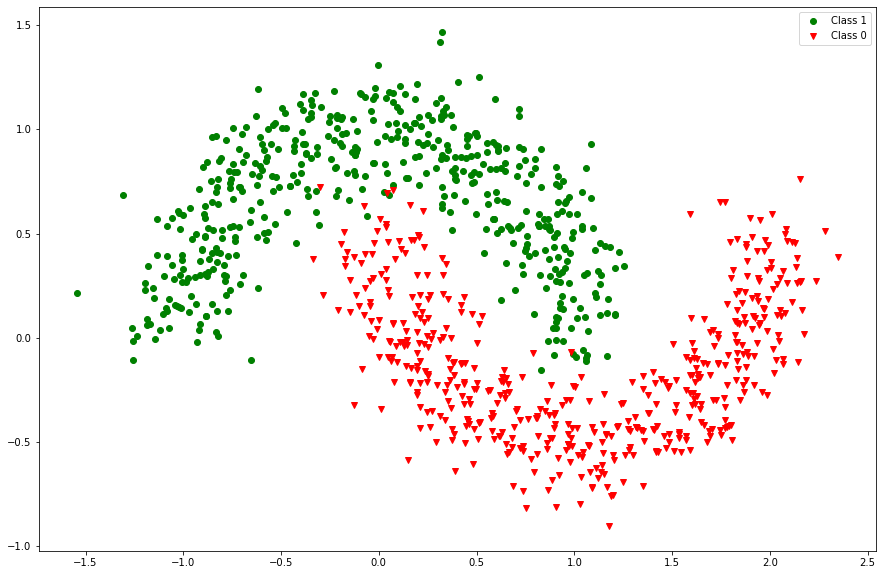

In [6]:
import matplotlib.pyplot as plt

index_c0 = (y == 0)
index_c1 = (y == 1)

plt.figure(figsize=(15, 10))

plt.plot(X[index_c0][:,0], X[index_c0][:,1], 'go', label='Class 1')
plt.plot(X[index_c1][:,0], X[index_c1][:,1], 'rv', label='Class 0')
plt.legend()



In [7]:
# Train a classifier
tree_moons_4 = DecisionTreeClassifier(max_depth=4)
tree_moons_4.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

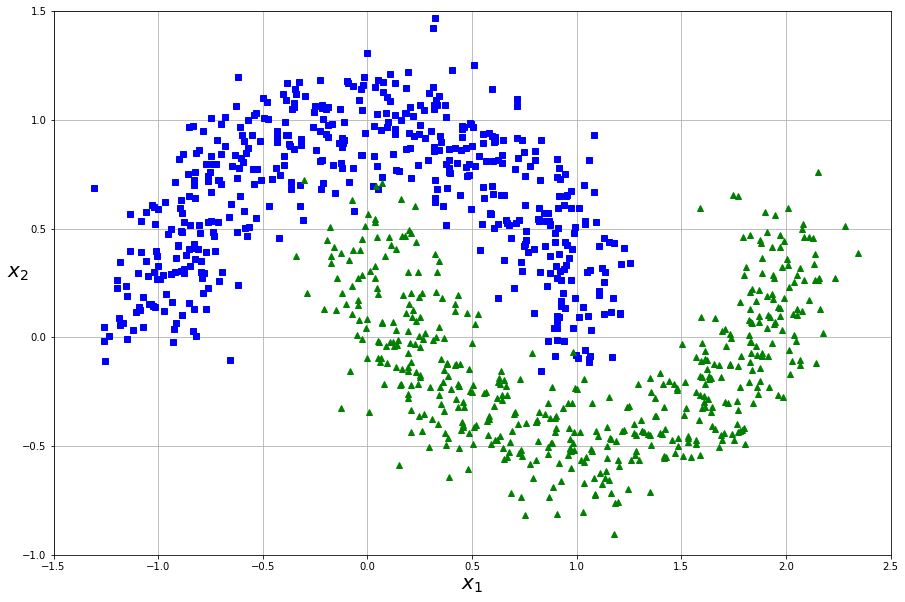

In [8]:
def plot_dataset(X, y, axes):
    "Plot the Moons dataset with two classes: 0 and 1"
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Plot the data
plt.figure(figsize=(15, 10))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()




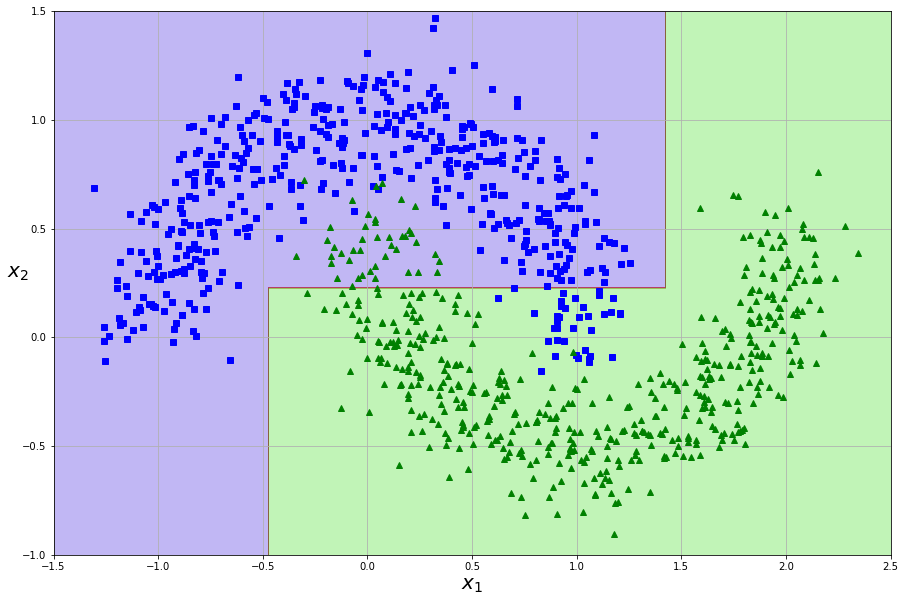

In [11]:
import numpy as np

def plot_predictions(clf, axes):
    "Visualize what the classifier will choose on this dataset"
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(tree_moons_4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Outstanding. That was too shallow, even though the depth was 4. Let's print the decision tree itself to see what it looks like.

In [18]:
export_graphviz(tree_moons_4, 
                out_file="tree_moons_4.dot",
                feature_names=['X1', 'X2'],
                class_names=["BlueSquare", 'GreenTriangle'],
                rounded = True,
                filled = True,
               )

In [14]:
tree_moons_8 = DecisionTreeClassifier(max_depth=8)
tree_moons_8.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

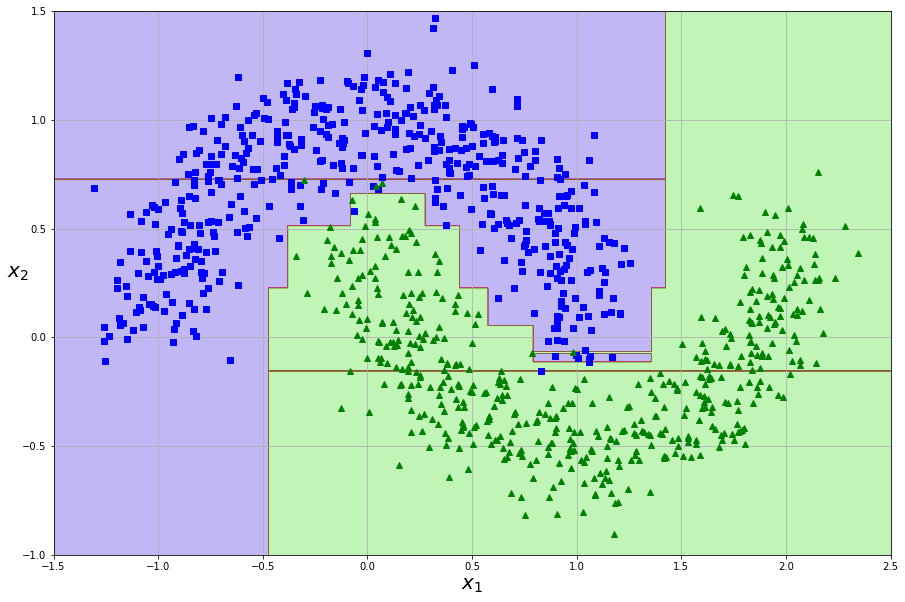

In [15]:
# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(tree_moons_8, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
DecisionTreeClassifier?

The previous classifier was clearly over-fitting, so let's add a regularization parameter
(min_samples_leaf=4) to avoid breaking into too small a node.

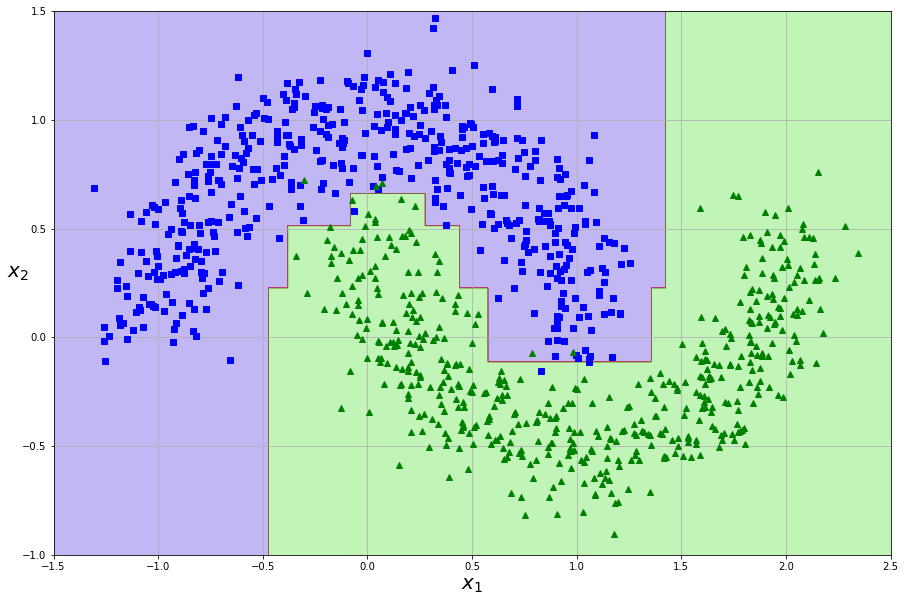

In [17]:
moons_sl4 = DecisionTreeClassifier(min_samples_leaf=4)
moons_sl4.fit(X, y)

# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(moons_sl4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [19]:
export_graphviz(moons_sl4, 
                out_file="moons_sl4.dot",
                feature_names=['X1', 'X2'],
                class_names=["BlueSquare", 'GreenTriangle'],
                rounded = True,
                filled = True,
               )